In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df1 = pd.read_csv('train_dataset.csv')
df1

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,spongiosis,follicular_horn_plug,inflammatory_mononuclear_infiltrate,age,class
0,2,3,2,3,3,2,0,2,0,0,...,0,0,0,3,2,1,0,2,27,3
1,2,2,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,52,5
2,2,2,2,0,2,0,0,0,0,0,...,0,0,0,0,0,2,0,1,30,4
3,2,2,1,0,1,0,0,0,0,0,...,0,0,0,0,1,3,0,2,62,4
4,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,2,0,3,22,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,1,1,0,1,0,0,3,0,1,0,...,0,0,0,0,0,0,1,1,9,6
530,2,1,1,0,0,0,2,0,2,0,...,0,0,0,0,0,0,2,0,12,6
531,2,2,0,0,0,0,2,0,2,1,...,0,0,0,0,0,1,2,2,7,6
532,2,1,2,0,0,0,2,0,2,0,...,0,0,0,0,0,0,2,0,11,6


In [2]:
X_train_sm = df1.drop('class', axis=1)
y_train_sm = df1['class']

In [3]:
import pandas as pd
df2 = pd.read_csv('test_dataset.csv')
df2

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,spongiosis,follicular_horn_plug,inflammatory_mononuclear_infiltrate,age,class
0,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,36,2
1,3,1,2,3,2,2,0,2,0,0,...,0,0,0,2,0,0,0,3,16,3
2,2,1,2,0,2,0,0,0,0,0,...,0,0,0,0,0,2,0,1,35,4
3,1,3,1,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,3,60,1
4,3,2,1,0,2,0,0,0,0,0,...,0,0,0,0,0,3,0,2,45,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2,2,2,2,1,2,0,2,0,0,...,0,0,0,2,0,3,0,2,36,3
70,2,2,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,30,2
71,2,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,27,4
72,2,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,2,0,2,35,2


In [4]:
X_test = df2.drop('class',axis=1)
y_test = df2['class']

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Create a pipeline to scale data + train KNN
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5))   # change k if needed
])

# 2) Train model on SMOTE-balanced data
knn_pipeline.fit(X_train_sm, y_train_sm)

# 3) Predict on test data
y_pred_knn = knn_pipeline.predict(X_test)

# 4) Accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", acc_knn)

# 5) Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.9054054054054054

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.96      0.98        23
           2       0.78      0.58      0.67        12
           3       1.00      1.00      1.00        15
           4       0.64      0.90      0.75        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.91        74
   macro avg       0.90      0.91      0.90        74
weighted avg       0.92      0.91      0.91        74



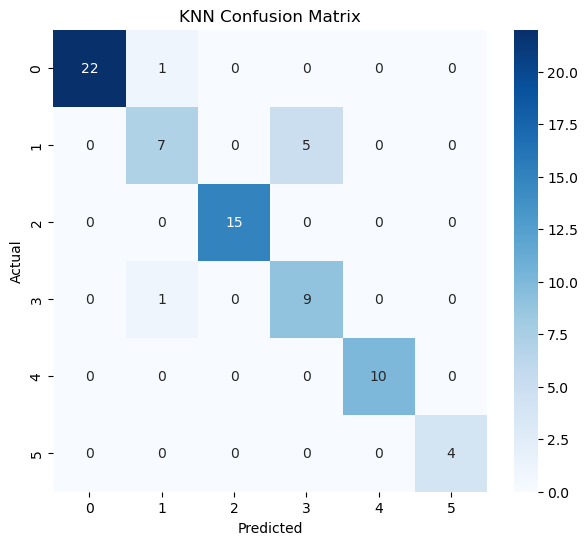

In [6]:

# 6) Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)


# 7) Heatmap
plt.figure(figsize=(7,6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()


In [7]:
# KNN hyperparameter tuning (GridSearchCV) — prints best params
import warnings
warnings.filterwarnings("ignore")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Pipeline (scaling + KNN)
pipe_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

# Parameter grid (sensible defaults to search)
param_grid_knn = {
    "knn__n_neighbors": [3, 5, 7, 9, 11, 15],
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["minkowski", "euclidean", "manhattan"],
    # if metric == 'minkowski', p controls the power parameter (1 = manhattan, 2 = euclidean)
    "knn__p": [1, 2],
    "knn__leaf_size": [20, 30, 40]
}

# Stratified CV to respect class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV (scoring uses macro F1 because of class imbalance)
grid_knn = GridSearchCV(
    estimator=pipe_knn,
    param_grid=param_grid_knn,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1,
    verbose=2,
    return_train_score=False
)

# Fit on the SMOTE-balanced training set
grid_knn.fit(X_train_sm, y_train_sm)

# Print best parameters and CV score
print("BEST PARAMETERS (KNN):")
print(grid_knn.best_params_)
print("\nBEST CV SCORE (f1_macro):", grid_knn.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
BEST PARAMETERS (KNN):
{'knn__leaf_size': 20, 'knn__metric': 'minkowski', 'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'uniform'}

BEST CV SCORE (f1_macro): 0.9886991032385769


Using Best Parameters: {'knn__leaf_size': 20, 'knn__metric': 'minkowski', 'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'uniform'}

Test Accuracy: 0.918918918918919

Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        23
           2       0.89      0.67      0.76        12
           3       1.00      1.00      1.00        15
           4       0.69      0.90      0.78        10
           5       0.91      1.00      0.95        10
           6       1.00      1.00      1.00         4

    accuracy                           0.92        74
   macro avg       0.92      0.92      0.91        74
weighted avg       0.93      0.92      0.92        74



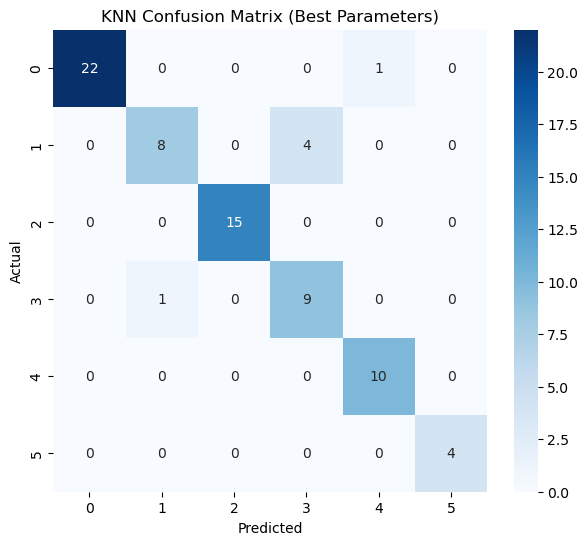

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 1) Extract the best parameters
best_knn_params = grid_knn.best_params_
print("Using Best Parameters:", best_knn_params)

# 2) Rebuild the KNN model with best parameters
best_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(
        n_neighbors = best_knn_params["knn__n_neighbors"],
        weights     = best_knn_params["knn__weights"],
        metric      = best_knn_params["knn__metric"],
        p           = best_knn_params["knn__p"],
        leaf_size   = best_knn_params["knn__leaf_size"]
    ))
])

# 3) Train the best KNN
best_knn.fit(X_train_sm, y_train_sm)

# 4) Test on the test dataset
y_pred_best_knn = best_knn.predict(X_test)

# 5) Print accuracy
print("\nTest Accuracy:", accuracy_score(y_test, y_pred_best_knn))

# 6) Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_best_knn))

# 7) Confusion matrix
cm_knn_best = confusion_matrix(y_test, y_pred_best_knn)

plt.figure(figsize=(7,6))
sns.heatmap(cm_knn_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix (Best Parameters)")
plt.show()


KNN Macro AUC Score: 0.979523689516129


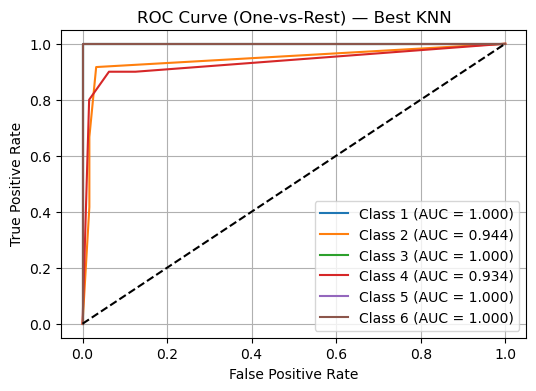

In [10]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------
# 1) Predict probabilities with best KNN
# -----------------------------------------
y_score_knn = best_knn.predict_proba(X_test)

# -----------------------------------------
# 2) Binarize labels (One-vs-Rest)
# -----------------------------------------
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# -----------------------------------------
# 3) Macro AUC Score
# -----------------------------------------
auc_macro_knn = roc_auc_score(
    y_test_bin, 
    y_score_knn, 
    multi_class='ovr', 
    average='macro'
)

print("KNN Macro AUC Score:", auc_macro_knn)

# -----------------------------------------
# 4) Plot ROC Curve for each class
# -----------------------------------------
plt.figure(figsize=(6, 4))

for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_knn[:, i])
    class_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {cls} (AUC = {class_auc:.3f})")

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest) — Best KNN")
plt.legend()
plt.grid(True)
plt.show()
